### Assignment 6

## Knock Airport Weather

This notebook will retrieve the data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv which I will use to analyse the data. 

import libraries

In [1]:
import os
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


import the data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [2]:
data = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', delimiter=',', on_bad_lines='skip', low_memory=False, skiprows=23)

Convert into a Pandas DataFrame

In [3]:
df = pd.DataFrame(data)

Check the data

In [4]:
print(df.head())

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


The first 22 rows of the file are information regarding Knock airport and what each column is. It is not "useful" data in regards to this notebook. Skip rows =23 was added to the code when importing the csv file to remedy this. The same error was showing in the tail and was eliminated at the same time.

In [5]:
print(df.tail())

                     date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
247669  31-oct-2024 20:00    0  0.2      0  10.1      0  10.1   10.1   12.4   
247670  31-oct-2024 21:00    0  0.1      0  10.1      0  10.1   10.0   12.4   
247671  31-oct-2024 22:00    0  0.0      0  10.0      0  10.0   10.0   12.3   
247672  31-oct-2024 23:00    0  0.1      0   9.8      0   9.8    9.8   12.1   
247673  01-nov-2024 00:00    0  0.0      0   9.7      0   9.6    9.6   11.9   

        rhum  ... ind.3  wdsp ind.4  wddir ww  w  sun  vis clht clamt  
247669   100  ...     2     5     2    220        0.0         0     8  
247670   100  ...     2     5     2    230        0.0         0     8  
247671   100  ...     2     4     2    210        0.0         0     8  
247672   100  ...     2     6     2    200        0.0         0     8  
247673    99  ...     2     6     2    210        0.0         0     8  

[5 rows x 21 columns]


Drop null values from the dataFrame

In [6]:
df = df.dropna()

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   ind     247674 non-null  int64  
 2   rain    247674 non-null  object 
 3   ind.1   247674 non-null  int64  
 4   temp    247674 non-null  float64
 5   ind.2   247674 non-null  int64  
 6   wetb    247674 non-null  float64
 7   dewpt   247674 non-null  float64
 8   vappr   247674 non-null  float64
 9   rhum    247674 non-null  int64  
 10  msl     247674 non-null  object 
 11  ind.3   247674 non-null  int64  
 12  wdsp    247674 non-null  object 
 13  ind.4   247674 non-null  int64  
 14  wddir   247674 non-null  object 
 15  ww      247674 non-null  object 
 16  w       247674 non-null  object 
 17  sun     247674 non-null  float64
 18  vis     247674 non-null  object 
 19  clht    247674 non-null  object 
 20  clamt   247674 non-null  object 
dtypes: float64

In [8]:
print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


To make plotting easier convert the date column to datetime

In [9]:
df['date'] = pd.to_datetime(df['date'])  # Replace 'date' with the correct column name

/tmp/ipykernel_16021/3374805088.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Replace 'date' with the correct column name


In [10]:
print(df['date'].head())


0   1996-04-10 14:00:00
1   1996-07-31 08:00:00
2   1996-07-31 09:00:00
3   1996-07-31 10:00:00
4   1996-07-31 11:00:00
Name: date, dtype: datetime64[ns]


Plot the Temperature Data

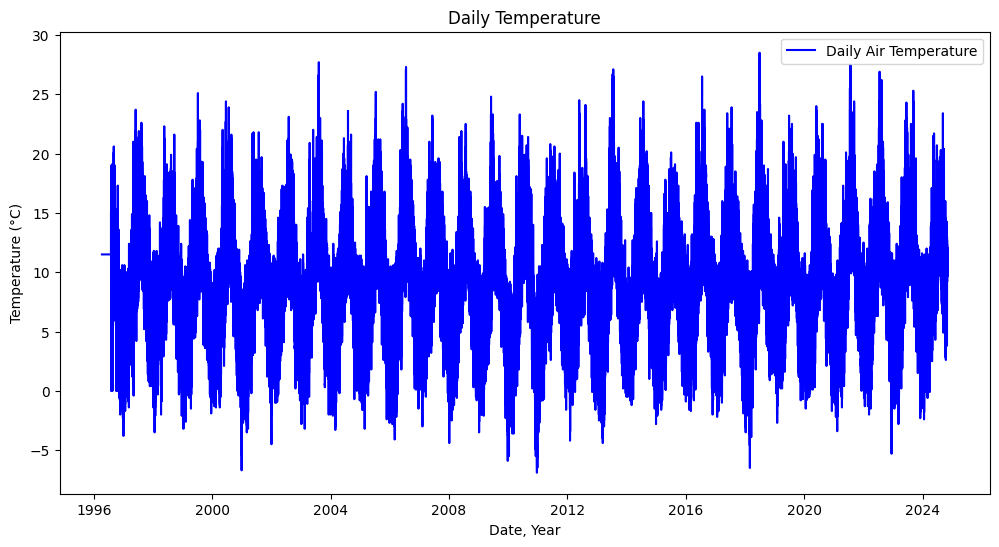

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp'], label='Daily Air Temperature', color='blue')
plt.title('Daily Temperature')
plt.xlabel('Date, Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Calculate and plot the mean Temperature each day

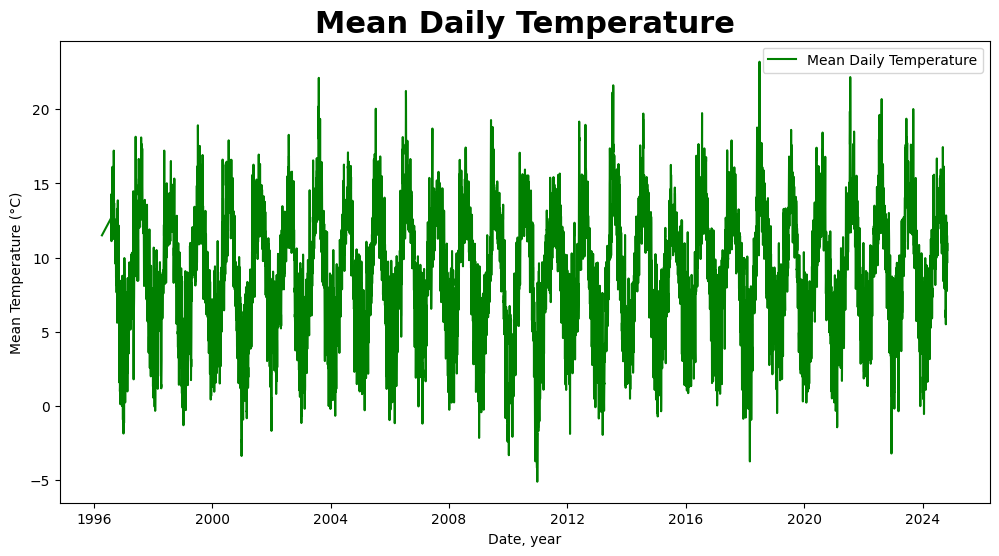

In [12]:
mean_daily_temp = df.groupby(df['date'].dt.date)['temp'].mean()
plt.figure(figsize=(12, 6))
plt.plot(mean_daily_temp.index, mean_daily_temp.values, label='Mean Daily Temperature', color='green')
plt.title('Mean Daily Temperature', fontweight='bold', fontsize=22)
plt.xlabel('Date, year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

Calculate and plot the mean temperature each month

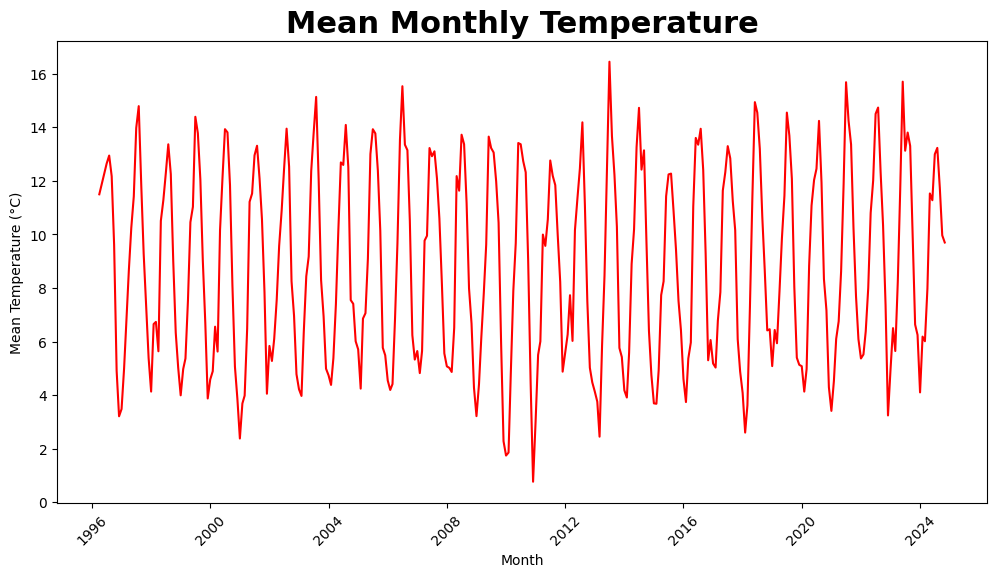

In [13]:
df['Month'] = df['date'].dt.to_period('M')
mean_monthly_temp = df.groupby('Month')['temp'].mean()
mean_monthly_temp.index = mean_monthly_temp.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(mean_monthly_temp.index, mean_monthly_temp.values, label='Mean Monthly Temperature', color='red')
plt.title('Mean Monthly Temperature', fontweight='bold',fontsize=22)
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

 Plot:

 - The Windspeed (there is data missing from this column)
 - The rolling windspeed (say over 24 hours)
 - The max windspeed for each day
 - The monthly mean of the daily max windspeeds (yes I am being nasty here) 
(Assignment outline)

As there is data missing from the windspeed column, that must be dealt with first.

In [14]:
df.nunique()
df['wdsp'].unique()
df = df.replace('---', np.nan)
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [15]:
df = df.dropna()

Calculate the windspeed and plot

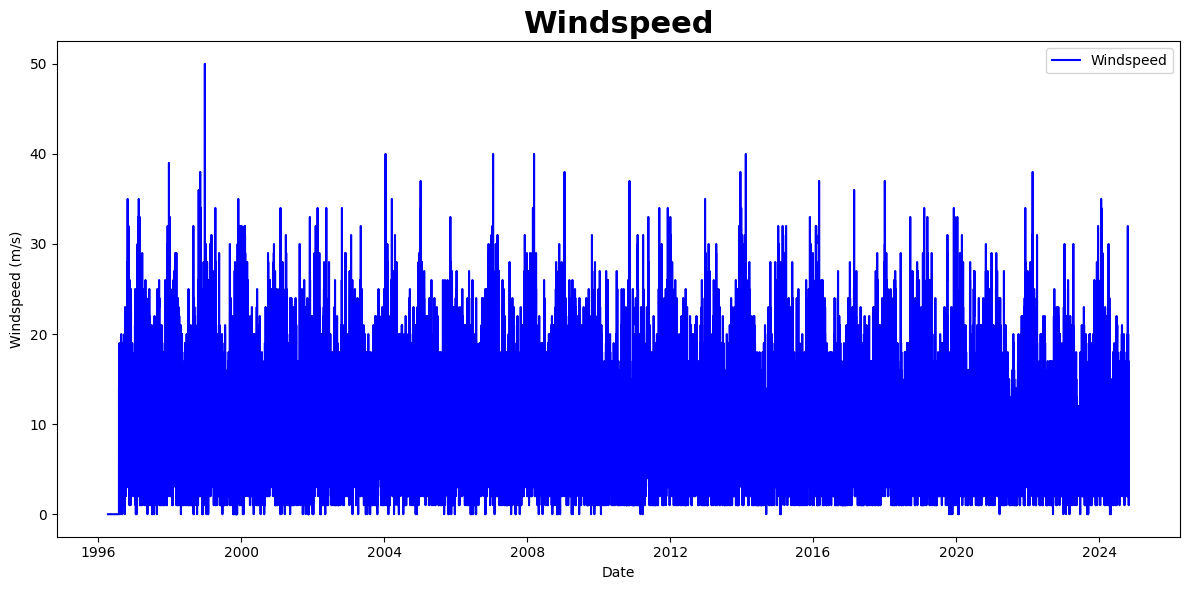

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['wdsp'], label='Windspeed', color='blue')
plt.title('Windspeed', fontweight='bold', fontsize=22)
plt.xlabel('Date')
plt.ylabel('Windspeed (m/s)')
plt.legend()
plt.tight_layout()
plt.show()

Calculate the rolling windspeed over 24hrs and plot

In [24]:
data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce')
data['Rolling_Windspeed'] = data['wdsp'].rolling(window=24).mean()
data['date'] = pd.to_datetime(data['date'])

/tmp/ipykernel_16021/2854676721.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


Plot the rolling windspeed

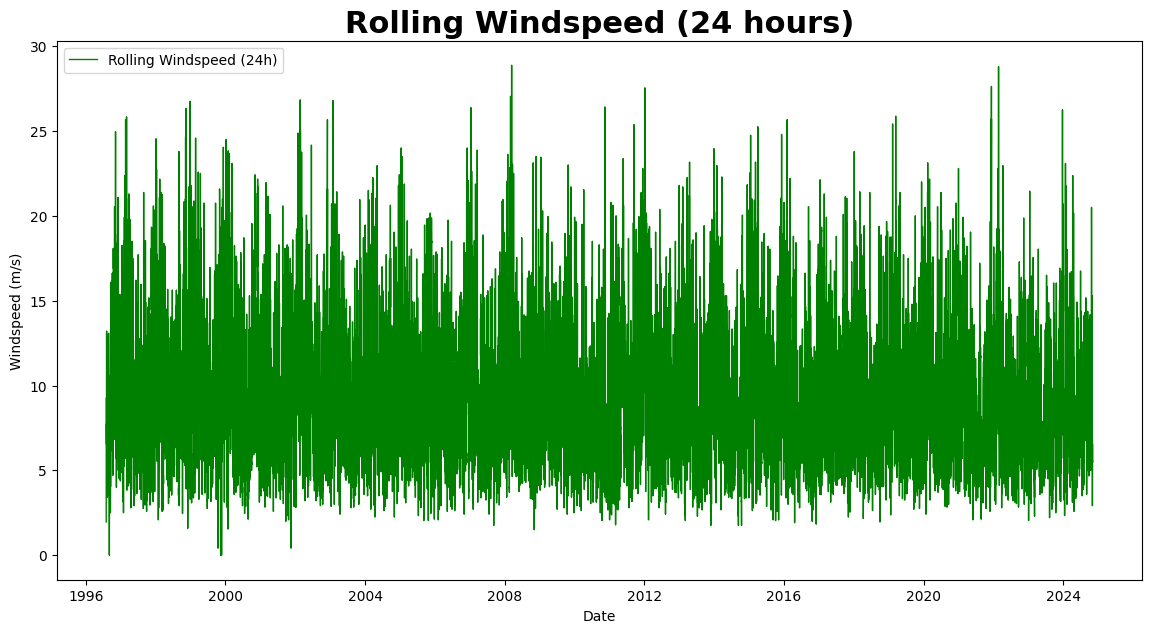

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['Rolling_Windspeed'], label='Rolling Windspeed (24h)', color='green', linewidth=1)
plt.title('Rolling Windspeed (24 hours)', fontweight='bold', fontsize=22)
plt.xlabel('Date')
plt.ylabel('Windspeed (m/s)')
plt.legend()
plt.show()

In [19]:
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' column is in datetime format
df.set_index('date', inplace=True)
daily_max_windspeed = df['wdsp'].resample('D').max()

Calculate and plot the max daily windspeed

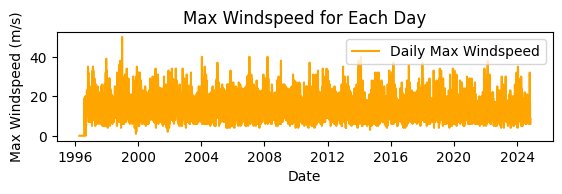

In [20]:
df_reset = df.reset_index()  # Reset the index to access 'date' column
daily_max_windspeed = df_reset.groupby(df_reset['date'].dt.date)['wdsp'].max()

plt.subplot(3, 1, 2)
plt.plot(daily_max_windspeed.index, daily_max_windspeed.values, label='Daily Max Windspeed', color='orange')
plt.title('Max Windspeed for Each Day')
plt.xlabel('Date')
plt.ylabel('Max Windspeed (m/s)')
plt.legend()

Calculate and plot the mean of the max windspeed

/tmp/ipykernel_16021/1452985184.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_max_windspeed = daily_max_windspeed.resample('M').mean()


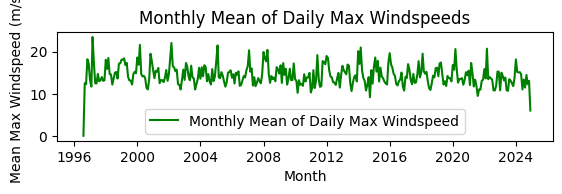

In [22]:
daily_max_windspeed.index = pd.to_datetime(daily_max_windspeed.index)  # Ensure the index is a DatetimeIndex
monthly_mean_max_windspeed = daily_max_windspeed.resample('M').mean()

plt.subplot(3, 1, 3)
plt.plot(monthly_mean_max_windspeed.index, monthly_mean_max_windspeed.values, label='Monthly Mean of Daily Max Windspeed', color='green')
plt.title('Monthly Mean of Daily Max Windspeeds')
plt.xlabel('Month')
plt.ylabel('Mean Max Windspeed (m/s)')
plt.legend()

## References
https://www.kdnuggets.com/7-essential-data-quality-checks-with-pandas

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

https://www.geeksforgeeks.org/python-pandas-to_datetime/

https://matplotlib.org/stable/tutorials/pyplot.html
